**Домашние задания к уроку 1. Алгоритм линейной регрессии. Градиентный спуск**
1. Проведите небольшое исследование алгоритма градиентного спуска на данных из урока. Оцените влияние значений скорости обучения (`eta`) и количества итераций на ошибку алгоритма. Как связаны эти два гиперпараметра между собой? Подберите скорость обучения и количество итераций до совпадения ответов алгоритма с результатами МНК. Как можно ускорить процесс вычисления весов?  
2. $*$ В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:
3. $*$ Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога. Сколько нужно сделать итераций, если установить допустимое отклонение mse за одну итерацию в размере diff=1e-6, а значение eta=1e-2?

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],     # для умножения на intercept
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]).T # стаж репетитора
# средний балл ЕГЭ (целевая переменная)
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [3]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

В функции реализованы 2 и 3 задачи.

In [4]:
def run_gd(x, y, max_iters=1000, eta=1e-3, diff=0.):
    n = x.shape[0]
    prev_err, err = np.inf, 0.
    w=np.array([1, 0.5])
    
    for i in range(max_iters):
        if abs(prev_err - err) < diff:
            break
        
        y_pred = np.dot(x, w)
        prev_err = err
        err = calc_mse(y, y_pred)
        w -= (eta * (1/n * 2 * np.sum(x.T * (y_pred - y), axis=1)))
    
    return (w, err, i)

In [5]:
(w, err, iters) = run_gd(X, y, eta=1e-2, diff=1e-6)  # 3е задание
print(f'Веса: {w}, ошибка: {err}, затраченное число итераций: {iters}')

Веса: [47.22286276  3.91242793], ошибка: 45.937547277798465, затраченное число итераций: 810


Фискируем количество итераций и получим ошибку для каждой $\eta \in [10^{-6}, 1.]$ - построим график зависимости ошибки от $\eta$, чтобы опередлить оптимальное значение для $\eta$.

In [6]:
etas = np.logspace(-6, 0, 20)
examples = [[run_gd(X, y, max_iters=iters, eta=_eta)[1] for _eta in etas] for iters in (500, 1000, 2000)]
etas, examples

(array([1.00000000e-06, 2.06913808e-06, 4.28133240e-06, 8.85866790e-06,
        1.83298071e-05, 3.79269019e-05, 7.84759970e-05, 1.62377674e-04,
        3.35981829e-04, 6.95192796e-04, 1.43844989e-03, 2.97635144e-03,
        6.15848211e-03, 1.27427499e-02, 2.63665090e-02, 5.45559478e-02,
        1.12883789e-01, 2.33572147e-01, 4.83293024e-01, 1.00000000e+00]),
 [[3110.338998672967,
   3045.207750459165,
   2916.8008192317134,
   2676.290722598546,
   2270.5289184024496,
   1715.3632830305773,
   1205.2594086963159,
   944.8088974928744,
   783.7199062765897,
   553.9910603283303,
   280.6712658518792,
   93.35061355809174,
   47.65529214843613,
   45.93923058991209,
   45.93750000093512,
   45.93750000000001,
   inf,
   nan,
   nan,
   nan],
  [3049.239029850246,
   2924.6265623580825,
   2690.484109669007,
   2292.914159094003,
   1741.9538042356805,
   1223.7055567777925,
   952.4399906491823,
   792.1706506206554,
   566.0951740372614,
   292.46604133432777,
   98.48200809872728,
   

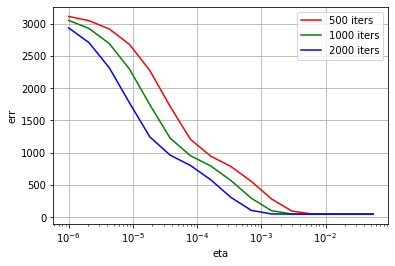

In [7]:
plt.plot(etas, examples[0], 'r', label='500 iters')
plt.plot(etas, examples[1], 'g', label='1000 iters')
plt.plot(etas, examples[2], 'b', label='2000 iters')
plt.xscale('log')
plt.xlabel('eta')
plt.ylabel('err')
plt.grid()
plt.legend();

Видно, что большее количество итераций приводит к меньшим значениям ошибки. Также можно сделать вывод, что чем меньше значение $\eta$, тем больше итераций потребуется для достижения минимальной ошибки, но при этом минимум точно не будет пройден. Если же увеличивать $\eta$, то после превышения ею оптимальных значений, алгоритм будет расходится - будет перескакивать через минимум и увеличивать значение ошибки.
И видно, что наименьшая ошибка достигается при значении $\eta \approx 0.0545559478$ (берём результаты при 500 итераций - сходимость нагляднее).

Повторим ту же процедуру для $\eta \in [0.04, 0.07]$ для более точного определения оптимального $\eta$, но теперь оценим влияние на количество итераций, необходимых для получения ошибки с заданным порогом diff.

In [8]:
etas = np.linspace(.04, .07, 10)
examples = [[run_gd(X, y, eta=_eta, diff=_diff)[2] for _eta in etas] for _diff in (10e-6, 10e-7, 10e-8)]
etas, examples

(array([0.04      , 0.04333333, 0.04666667, 0.05      , 0.05333333,
        0.05666667, 0.06      , 0.06333333, 0.06666667, 0.07      ]),
 [[190, 176, 164, 154, 145, 137, 129, 123, 999, 999],
  [217, 201, 188, 176, 165, 156, 147, 140, 999, 999],
  [245, 226, 211, 197, 185, 175, 165, 157, 999, 999]])

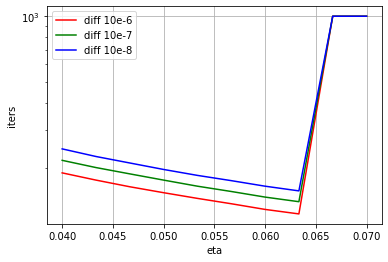

In [9]:
plt.plot(etas, examples[0], 'r', label='diff 10e-6')
plt.plot(etas, examples[1], 'g', label='diff 10e-7')
plt.plot(etas, examples[2], 'b', label='diff 10e-8')
plt.yscale('log')
plt.xlabel('eta')
plt.ylabel('iters')
plt.grid()
plt.legend();

Из полученных результатов можно сделать вывод, что зависимость числа итераций от $\eta$ обратнопропорциональна до оптимальных значений $\eta$, а также что оптимально брать значение $\eta$ равным примерно 0.06333, тем самым потребуется минимальное количество итераций для достижения порогового значения ошибки, т.е. для вычисления весов.

In [10]:
(w, err, iters) = run_gd(X, y, eta=0.06333333, diff=10e-6)
print(f'Веса: {w}, ошибка: {err}, затраченное число итераций: {iters}')

Веса: [47.22203507  3.91269246], ошибка: 45.93756341236347, затраченное число итераций: 123


Потребовалось всего 140 итераций вместо 810 при $\eta = 0.02$, чтобы достичь ошибки с заданным diff $10^{-6}$

In [11]:
(w, err, iters) = run_gd(X, y, eta=0.06333333, diff=10e-20)
print(f'Веса: {w}, ошибка: {err}, затраченное число итераций: {iters}')

Веса: [47.23214222  3.9107144 ], ошибка: 45.93750000000027, затраченное число итераций: 265
